In [1]:
#!pip install pandas
#!pip install numpy
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('seasonal_disparities_20th_century.csv')

In [3]:
df.head()

,FIPSCode,YEAR,Season,TEMPERATURE_MA,TEMPERATURE_DEVIATION_STDDEV,TEMPERATURE_INDEX,PRECIPITATION_MA,PRECIPITATION_DEVIATION_STDDEV,PRECIPITATION_INDEX
0,6001,2021,Summer,68.7,1.847292,Normal,0.00,-0.686548,Normal
1,6005,2021,Winter,42.6,-0.506057,Normal,12.34,1.702105,Normal
2,6009,2021,Winter,42.6,-0.542606,Normal,10.80,1.422228,Normal
3,6019,2021,Winter,41.0,0.454152,Normal,6.96,1.639776,Normal
4,6029,2021,Summer,79.3,2.528477,Hotter,0.05,-0.067581,Normal


In [4]:
df.columns

Index(['FIPSCode', 'YEAR', 'Season', 'TEMPERATURE_MA',
       'TEMPERATURE_DEVIATION_STDDEV', 'TEMPERATURE_INDEX', 'PRECIPITATION_MA',
       'PRECIPITATION_DEVIATION_STDDEV', 'PRECIPITATION_INDEX'],
      dtype='object')

In [5]:
df.TEMPERATURE_INDEX.unique()

array(['Normal', 'Hotter', 'Cooler'], dtype=object)

In [6]:
len(df.FIPSCode.unique())

3140

In [7]:
colors = {'Hotter': 'red', 'Cooler': 'blue', 'Normal':'grey'}

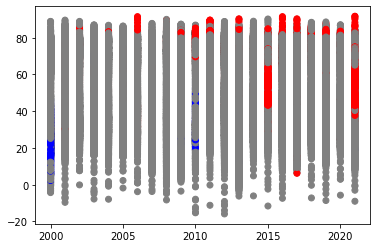

In [8]:
_ = plt.scatter(df.YEAR, df.TEMPERATURE_MA, color=df.TEMPERATURE_INDEX.map(colors))

In [7]:
fips_df = pd.read_excel('County-Type-Share.xlsx', sheet_name='Sheet1')

/Users/ally/anaconda3/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [8]:
state = [val[-2:] for val in fips_df['County']]

In [9]:
fips_df['state'] = state
fips_df.head()

,County,Type Number,FIPS,Type Number.1,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,state
0,Autauga AL,1,1001,1,NaN,NaN,NaN,NaN,AL
1,Elmore AL,1,1051,1,NaN,NaN,NaN,NaN,AL
2,Limestone AL,1,1083,1,NaN,NaN,NaN,NaN,AL
3,St. Clair AL,1,1115,1,NaN,NaN,NaN,NaN,AL
4,Shelby AL,1,1117,1,NaN,NaN,NaN,NaN,AL


In [10]:
fips_df.state.unique()

array(['AL', 'AR', 'CA', 'CO', 'CT', 'FL', 'GA', 'ID', 'IL', 'IN', 'IA',
       'KS', 'KY', 'LA', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NV',
       'NH', 'NJ', 'NM', 'NY', 'NC', 'OH', 'OK', 'OR', 'PA', 'SC', 'SD',
       'TN', 'TX', 'VA', 'WA', 'WV', 'WI', 'WY', 'AK', 'ea', 'a ', 'ty',
       'AZ', 'DE', 'HI', 'ME', 'NE', 'ND', 'UT', 'VT', 'gh', 'RI', 'h ',
       'DC'], dtype=object)

In [11]:
fips = pd.read_excel('County-Type-Share.xlsx', sheet_name='Sheet2')
fips = fips.to_dict('series')['New Names']
fips

0                     Exurbs
1            Graying America
2     African American South
3           Evangelical Hubs
4      Working Class Country
5             Military Posts
6              Urban Suburbs
7           Hispanic Centers
8      Native American Lands
9       Rural Middle America
10             College Towns
11              LDS Enclaves
12           Aging Farmlands
13                Big Cities
14            Middle Suburbs
Name: New Names, dtype: object

In [12]:
fips_dict = dict(fips)
fips_dict

{0: 'Exurbs',
 1: 'Graying America',
 2: 'African American South',
 3: 'Evangelical Hubs',
 4: 'Working Class Country',
 5: 'Military Posts',
 6: 'Urban Suburbs',
 7: 'Hispanic Centers',
 8: 'Native American Lands',
 9: 'Rural Middle America',
 10: 'College Towns',
 11: 'LDS Enclaves',
 12: 'Aging Farmlands',
 13: 'Big Cities',
 14: 'Middle Suburbs'}

In [13]:
fips_df = fips_df[['County', 'Type Number', 'FIPS']]
fips_df.head()

,County,Type Number,FIPS
0,Autauga AL,1,1001
1,Elmore AL,1,1051
2,Limestone AL,1,1083
3,St. Clair AL,1,1115
4,Shelby AL,1,1117


In [14]:
df_merge = df.merge(fips_df, left_on='FIPSCode', right_on='FIPS')

In [15]:
df_merge = df_merge.drop(columns=['FIPS'])

In [16]:
df_merge.head()

,FIPSCode,YEAR,Season,TEMPERATURE_MA,TEMPERATURE_DEVIATION_STDDEV,TEMPERATURE_INDEX,PRECIPITATION_MA,PRECIPITATION_DEVIATION_STDDEV,PRECIPITATION_INDEX,County,Type Number
0,6001,2021,Summer,68.7,1.847292,Normal,0.00,-0.686548,Normal,Alameda CA,14
1,6001,2021,Winter,46.7,-0.168408,Normal,6.75,1.564625,Normal,Alameda CA,14
2,6001,2020,Winter,51.0,1.794071,Normal,1.66,-0.698115,Normal,Alameda CA,14
3,6001,2020,Summer,69.2,2.098282,Hotter,0.00,-0.686548,Normal,Alameda CA,14
4,6001,2019,Summer,69.0,1.997886,Normal,0.00,-0.686548,Normal,Alameda CA,14


In [17]:
df_merge = df_merge.dropna()

In [18]:
#df_merge.Season.unique()
season_num = []
for val in df_merge.Season:
    if val == 'Summer':
        season_num.append(0)
    else :
        season_num.append(1)

In [21]:
X = df_merge[['TEMPERATURE_MA', 'TEMPERATURE_DEVIATION_STDDEV', 'PRECIPITATION_MA','PRECIPITATION_DEVIATION_STDDEV', 'YEAR']]
X['Season'] = season_num
y = df_merge[['Type Number']]

/Users/ally/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
colors = {
    1: '#ef1101',
    2 :'#5c0300',
    3 : '#fd9206',
    4: '#a45d00',
    5: '#fef636',
    6: '#8f8a00',
    7: '#0efd0e',
    8: '#009a00',
    9: '#010afb',
    10: '#0006a4',
    11: '#ba20fd',
    12: '#7600a8',
    13: '#080f0f',
    14: '#faffff'
}

In [23]:
df_merge.YEAR.unique().shape

(22,)

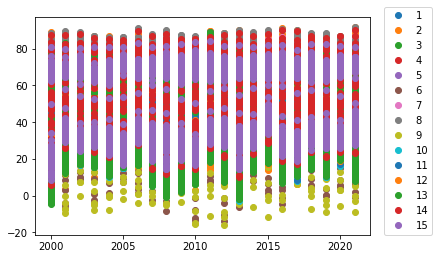

In [24]:
groups = df_merge.groupby("Type Number")
for name, group in groups:
    plt.plot(group["YEAR"], group["TEMPERATURE_MA"], marker="o", linestyle="", label=name)
plt.legend(loc=[1.04, 0])

In [22]:
df_year = df_merge[df_merge.YEAR > 2010]
df_year

,FIPSCode,YEAR,Season,TEMPERATURE_MA,TEMPERATURE_DEVIATION_STDDEV,TEMPERATURE_INDEX,PRECIPITATION_MA,PRECIPITATION_DEVIATION_STDDEV,PRECIPITATION_INDEX,County,Type Number
0,6001,2021,Summer,68.7,1.847292,Normal,0.00,-0.686548,Normal,Alameda CA,14
1,6001,2021,Winter,46.7,-0.168408,Normal,6.75,1.564625,Normal,Alameda CA,14
2,6001,2020,Winter,51.0,1.794071,Normal,1.66,-0.698115,Normal,Alameda CA,14
3,6001,2020,Summer,69.2,2.098282,Hotter,0.00,-0.686548,Normal,Alameda CA,14
4,6001,2019,Summer,69.0,1.997886,Normal,0.00,-0.686548,Normal,Alameda CA,14
...,...,...,...,...,...,...,...,...,...,...,...
138132,54099,2013,Winter,38.2,0.474485,Normal,6.26,1.702560,Normal,Wayne WV,5
138139,54099,2012,Summer,71.5,0.127646,Normal,2.88,-0.709745,Normal,Wayne WV,5
138140,54099,2012,Winter,42.4,1.468915,Normal,5.34,1.144741,Normal,Wayne WV,5
138141,54099,2011,Summer,72.5,0.569327,Normal,3.87,-0.091816,Normal,Wayne WV,5


In [23]:
mini_df = df_year[['Type Number', 'PRECIPITATION_MA', 'TEMPERATURE_MA']]
mini_df.to_csv('Precip_Temp_df_2011_2021.csv')

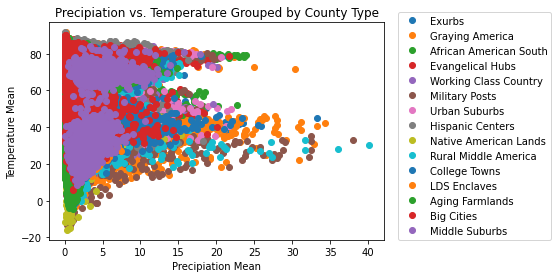

In [27]:
groups = df_merge.groupby("Type Number")
for name, group in groups:
    plt.plot(group["PRECIPITATION_MA"], group["TEMPERATURE_MA"], marker="o", linestyle="", label=fips[name-1])
    
plt.xlabel('Precipiation Mean')
plt.ylabel('Temperature Mean')
plt.title('Precipiation vs. Temperature Grouped by County Type')
plt.legend(loc=[1.04, 0])

plt.savefig('precip_temp.png')

## Regression

In [28]:
#train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression, LogisticRegression
reg = LinearRegression().fit(X_train, y_train)

#log = LogisticRegression().fit(X_train, y_train)

In [30]:
test = []
for row in X_test.iterrows():
    #print(row[1])
    ma_t = row[1]['TEMPERATURE_MA']
    std_t = row[1]['TEMPERATURE_DEVIATION_STDDEV']
    ma_p = row[1]['PRECIPITATION_MA']
    std_p = row[1]['PRECIPITATION_DEVIATION_STDDEV']
    year = row[1]['YEAR']
    season = row[1]['Season']
    test.append(np.floor(reg.predict([[ma_t, std_t, ma_p, std_p, year, season]]))[0])

In [31]:
df_test = pd.DataFrame(columns=['y', 'y_hat'])
df_test.y = y_test['Type Number']
df_test.y_hat = test

In [32]:
all_ = df_test.groupby(df_test.y).count()

df_good = df_test[df_test.y == df_test.y_hat]
good = df_good.groupby(df_good.y).count()

df_bad = df_test[df_test.y != df_test.y_hat]
bad = df_bad.groupby(df_bad.y).count()

df_compare_reg = pd.concat([all_, good, bad], axis=1)
df_compare_reg.columns = ['all count', 'good count', 'bad count']
df_compare_reg['type name'] = fips_dict.values()
df_compare_reg

,all count,good count,bad count,type name
y,,,,
1,3281,2.0,3279,Exurbs
2,5366,33.0,5333,Graying America
3,5408,278.0,5130,African American South
4,5326,704.0,4622,Evangelical Hubs
5,4788,1390.0,3398,Working Class Country
6,1286,256.0,1030,Military Posts
7,1539,276.0,1263,Urban Suburbs
8,2322,205.0,2117,Hispanic Centers
9,579,105.0,474,Native American Lands


In [34]:
col_names = ['type name', 'all count', 'good count', 'bad count']
df_compare_reg = df_compare_reg[col_names]
cols = ['Community Type', 'Total Count', 'Classified', 'Not Classified']
df_compare_reg.columns = cols

In [84]:
df_compare_reg.to_csv('reg.csv')

In [35]:
df_compare_reg

,Community Type,Total Count,Classified,Not Classified
y,,,,
1,Exurbs,3281,2.0,3279
2,Graying America,5366,33.0,5333
3,African American South,5408,278.0,5130
4,Evangelical Hubs,5326,704.0,4622
5,Working Class Country,4788,1390.0,3398
6,Military Posts,1286,256.0,1030
7,Urban Suburbs,1539,276.0,1263
8,Hispanic Centers,2322,205.0,2117
9,Native American Lands,579,105.0,474


## KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)

/Users/ally/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [74]:
test = []
for row in X_test.iterrows():
    #print(row[1])
    ma_t = row[1]['TEMPERATURE_MA']
    std_t = row[1]['TEMPERATURE_DEVIATION_STDDEV']
    ma_p = row[1]['PRECIPITATION_MA']
    std_p = row[1]['PRECIPITATION_DEVIATION_STDDEV']
    year = row[1]['YEAR']
    season = row[1]['Season']
    test.append(np.floor(knn.predict([[ma_t, std_t, ma_p, std_p, year, season]]))[0])

In [76]:
df_test = pd.DataFrame(columns=['y', 'y_hat'])
df_test.y = y_test['Type Number']
df_test.y_hat = test

In [77]:
all_ = df_test.groupby(df_test.y).count()

In [78]:
df_good = df_test[df_test.y == df_test.y_hat]
good = df_good.groupby(df_good.y).count()

In [79]:
df_bad = df_test[df_test.y != df_test.y_hat]
bad = df_bad.groupby(df_bad.y).count()

In [80]:
bad.columns

Index(['y_hat'], dtype='object')

In [81]:
df_compare_knn = pd.concat([all_, good, bad], axis=1)
df_compare_knn.columns = ['all count', 'good count', 'bad count']
df_compare_knn['type name'] = fips_dict.values()
df_compare_knn

,all count,good count,bad count,type name
y,,,,
1,3281,399,2882,Exurbs
2,5366,2725,2641,Graying America
3,5408,4220,1188,African American South
4,5326,2404,2922,Evangelical Hubs
5,4788,1506,3282,Working Class Country
6,1286,30,1256,Military Posts
7,1539,276,1263,Urban Suburbs
8,2322,808,1514,Hispanic Centers
9,579,20,559,Native American Lands


In [82]:
col_names = ['type name', 'all count', 'good count', 'bad count']
df_compare_knn = df_compare_knn[col_names]
cols = ['Community Type', 'Total Count', 'Classified', 'Not Classified']
df_compare_knn.columns = cols

In [83]:
df_compare_knn.to_csv('knn_10.csv')

In [51]:
df_compare_knn

,Community Type,Total Count,Classified,Not Classified
y,,,,
1,Exurbs,3281,303,2978
2,Graying America,5366,2695,2671
3,African American South,5408,4299,1109
4,Evangelical Hubs,5326,2425,2901
5,Working Class Country,4788,1491,3297
6,Military Posts,1286,17,1269
7,Urban Suburbs,1539,239,1300
8,Hispanic Centers,2322,769,1553
9,Native American Lands,579,18,561


## Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

/Users/ally/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [53]:
test = []
for row in X_test.iterrows():
    #print(row[1])
    ma_t = row[1]['TEMPERATURE_MA']
    std_t = row[1]['TEMPERATURE_DEVIATION_STDDEV']
    ma_p = row[1]['PRECIPITATION_MA']
    std_p = row[1]['PRECIPITATION_DEVIATION_STDDEV']
    year = row[1]['YEAR']
    season = row[1]['Season']
    test.append(np.floor(nb.predict([[ma_t, std_t, ma_p, std_p, year, season]]))[0])

In [54]:
df_test = pd.DataFrame(columns=['y', 'y_hat'])
df_test.y = y_test['Type Number']
df_test.y_hat = test

In [55]:
all_ = df_test.groupby(df_test.y).count()

df_good = df_test[df_test.y == df_test.y_hat]
good = df_good.groupby(df_good.y).count()

df_bad = df_test[df_test.y != df_test.y_hat]
bad = df_bad.groupby(df_bad.y).count()

df_compare_nb = pd.concat([all_, good, bad], axis=1)
df_compare_nb.columns = ['all count', 'good count', 'bad count']
df_compare_nb['type name'] = fips_dict.values()
df_compare_nb

,all count,good count,bad count,type name
y,,,,
1,3281,NaN,3281,Exurbs
2,5366,210.0,5156,Graying America
3,5408,2225.0,3183,African American South
4,5326,602.0,4724,Evangelical Hubs
5,4788,7.0,4781,Working Class Country
6,1286,26.0,1260,Military Posts
7,1539,NaN,1539,Urban Suburbs
8,2322,360.0,1962,Hispanic Centers
9,579,NaN,579,Native American Lands


In [56]:
col_names = ['type name', 'all count', 'good count', 'bad count']
df_compare_nb = df_compare_nb[col_names]
cols = ['Community Type', 'Total Count', 'Classified', 'Not Classified']
df_compare_nb.columns = cols

In [72]:
df_compare_nb.to_csv('nb.csv')

## Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2, random_state=0)

rf.fit(X_train, y_train)

/Users/ally/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(max_depth=2, random_state=0)

In [58]:
test = []
for row in X_test.iterrows():
    #print(row[1])
    ma_t = row[1]['TEMPERATURE_MA']
    std_t = row[1]['TEMPERATURE_DEVIATION_STDDEV']
    ma_p = row[1]['PRECIPITATION_MA']
    std_p = row[1]['PRECIPITATION_DEVIATION_STDDEV']
    year = row[1]['YEAR']
    season = row[1]['Season']
    test.append(np.floor(rf.predict([[ma_t, std_t, ma_p, std_p, year, season]]))[0])

In [59]:
df_test = pd.DataFrame(columns=['y', 'y_hat'])
df_test.y = y_test['Type Number']
df_test.y_hat = test

In [61]:
all_ = df_test.groupby(df_test.y).count()

df_good = df_test[df_test.y == df_test.y_hat]
good = df_good.groupby(df_good.y).count()

df_bad = df_test[df_test.y != df_test.y_hat]
bad = df_bad.groupby(df_bad.y).count()

df_compare_rf = pd.concat([all_, good, bad], axis=1)
df_compare_rf.columns = ['all count', 'good count', 'bad count']
df_compare_rf['type name'] = fips_dict.values()
df_compare_rf

,all count,good count,bad count,type name
y,,,,
1,3281,NaN,3281,Exurbs
2,5366,275.0,5091,Graying America
3,5408,2294.0,3114,African American South
4,5326,NaN,5326,Evangelical Hubs
5,4788,NaN,4788,Working Class Country
6,1286,NaN,1286,Military Posts
7,1539,NaN,1539,Urban Suburbs
8,2322,43.0,2279,Hispanic Centers
9,579,NaN,579,Native American Lands


In [62]:
col_names = ['type name', 'all count', 'good count', 'bad count']
df_compare_rf = df_compare_rf[col_names]
cols = ['Community Type', 'Total Count', 'Classified', 'Not Classified']
df_compare_rf.columns = cols

In [71]:
df_compare_rf.to_csv('rf.csv')

## decreasing parameters

In [63]:
X_small = X[['TEMPERATURE_MA', 'PRECIPITATION_MA', 'YEAR', 'Season']]

In [64]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
     X_small, y, test_size=0.33, random_state=42)

In [65]:
knn_s = KNeighborsClassifier(10)
knn_s.fit(X_train_s, y_train_s)

/Users/ally/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [66]:
test = []
for row in X_test.iterrows():
    #print(row[1])
    ma_t = row[1]['TEMPERATURE_MA']
    ma_p = row[1]['PRECIPITATION_MA']
    year = row[1]['YEAR']
    season = row[1]['Season']
    test.append(np.floor(knn_s.predict([[ma_t, ma_p, year, season]]))[0])

In [67]:
df_test = pd.DataFrame(columns=['y', 'y_hat'])
df_test.y = y_test['Type Number']
df_test.y_hat = test

In [68]:
all_ = df_test.groupby(df_test.y).count()

df_good = df_test[df_test.y == df_test.y_hat]
good = df_good.groupby(df_good.y).count()

df_bad = df_test[df_test.y != df_test.y_hat]
bad = df_bad.groupby(df_bad.y).count()

df_compare_knn_s = pd.concat([all_, good, bad], axis=1)
df_compare_knn_s.columns = ['all count', 'good count', 'bad count']
df_compare_knn_s['type name'] = fips_dict.values()
df_compare_knn_s

,all count,good count,bad count,type name
y,,,,
1,3281,334,2947,Exurbs
2,5366,2356,3010,Graying America
3,5408,3992,1416,African American South
4,5326,2058,3268,Evangelical Hubs
5,4788,1224,3564,Working Class Country
6,1286,23,1263,Military Posts
7,1539,132,1407,Urban Suburbs
8,2322,600,1722,Hispanic Centers
9,579,13,566,Native American Lands


In [69]:
col_names = ['type name', 'all count', 'good count', 'bad count']
df_compare_knn_s = df_compare_knn_s[col_names]
cols = ['Community Type', 'Total Count', 'Classified', 'Not Classified']
df_compare_knn_s.columns = cols

In [70]:
df_compare_knn_s.to_csv('small_knn_10.csv')